In [76]:
import numpy as np
import pandas as pd
df=pd.read_csv('poly.csv')
df

,sno,Temperature,Pressure
0,1,0,0.0002
1,2,20,0.0012
2,3,40,0.0060
3,4,60,0.0300
4,5,80,0.0900
5,6,100,0.2700


In [77]:
df.drop(['sno'],axis=1,inplace=True)
df

,Temperature,Pressure
0,0,0.0002
1,20,0.0012
2,40,0.0060
3,60,0.0300
4,80,0.0900
5,100,0.2700


In [78]:
x=df[['Temperature']]
y=df['Pressure']

In [79]:
#this is a simple data so no need of training phase
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x,y)
y_pred=model.predict(x)
y_pred

array([-0.05086667, -0.00402667,  0.04281333,  0.08965333,  0.13649333,
        0.18333333])

Text(0, 0.5, 'Pressure')

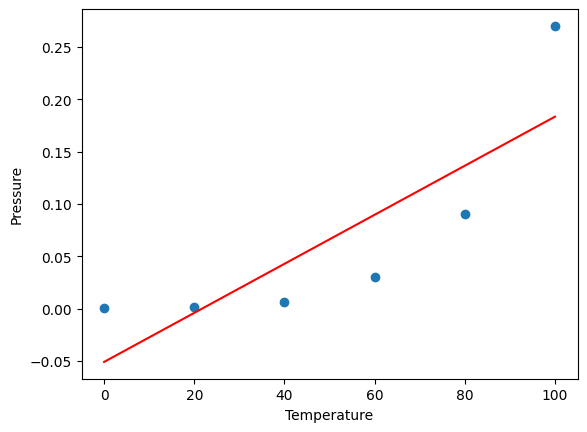

In [80]:
#regression line
import matplotlib.pyplot as plt
plt.scatter(x,y)
plt.plot(x,y_pred,'r')
plt.xlabel('Temperature')
plt.ylabel('Pressure')


In [81]:
from sklearn.metrics import mean_absolute_percentage_error,r2_score
print('mean_absolute_percentage_error = ',mean_absolute_percentage_error(y,y_pred))
print('r2_score = ',r2_score(y,y_pred))

mean_absolute_percentage_error =  44.775078189300416
r2_score =  0.690349972603981


In [82]:
#in this file performace is low and error is high, so here we use polynomial regression
from sklearn.preprocessing import PolynomialFeatures
feature=PolynomialFeatures(degree=3)
x_poly=feature.fit_transform(x)
x_poly

array([[1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00],
       [1.00e+00, 2.00e+01, 4.00e+02, 8.00e+03],
       [1.00e+00, 4.00e+01, 1.60e+03, 6.40e+04],
       [1.00e+00, 6.00e+01, 3.60e+03, 2.16e+05],
       [1.00e+00, 8.00e+01, 6.40e+03, 5.12e+05],
       [1.00e+00, 1.00e+02, 1.00e+04, 1.00e+06]])

In [83]:
model1=LinearRegression()
model1.fit(x_poly,y)
y_pred1=model1.predict(x_poly)
print('mean_absolute_percentage_error = ',mean_absolute_percentage_error(y,y_pred1))
print('r2_score = ',r2_score(y,y_pred1))

mean_absolute_percentage_error =  2.7865912208924066
r2_score =  0.9966691251761722


In [84]:
df1=pd.DataFrame({'Actual value':y,'simple pred':y_pred, 'poly pred':y_pred1})
df1

,Actual value,simple pred,poly pred
0,0.0002,-0.050867,-0.001989
1,0.0012,-0.004027,0.007244
2,0.0060,0.042813,0.003711
3,0.0300,0.089653,0.022489
4,0.0900,0.136493,0.098656
5,0.2700,0.183333,0.267289


Text(0, 0.5, 'Pressure')

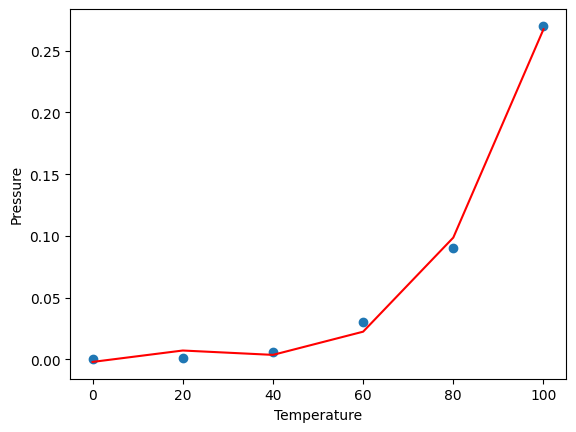

In [ ]:
plt.scatter(x,y)
plt.plot(x,y_pred1,'r')
plt.xlabel('Temperature')
plt.ylabel('Pressure')
#graph bent because of polynomimal regression